In [39]:
from pydub import AudioSegment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [40]:
angle=[]
# for i in range(len(np.arange(0,360,5))):
#     angle[i]=(str(angle[i]).rjust(3, '0'))
name = np.arange(-10,30,10)

for i in range(0,360,5):
    angle.append(str(i).rjust(3, '0'))
#  = AudioSegment.from_file("L20e"+i+"a.wav", "wav")]

In [41]:
df_L=pd.DataFrame(index=name,columns=angle)

In [42]:
for i in range(len(name)):
    for j in range(len(angle)):
        test= AudioSegment.from_file("elev"+str(name[i])+"/L"+str(name[i])+"e"+str(angle[j])+"a.wav", "wav")  
        list_sound = test.get_array_of_samples()
        df_L.iloc[i,j]=max(list_sound)

In [43]:
df_R=pd.DataFrame(index=name,columns=angle)
for i in range(len(name)):
    for j in range(len(angle)):
        test= AudioSegment.from_file("elev"+str(name[i])+"/R"+str(name[i])+"e"+str(angle[j])+"a.wav", "wav")  
        list_sound = test.get_array_of_samples()
        df_R.iloc[i,j]=max(list_sound)

In [44]:
df_copy=df_R

In [45]:
for i in range(len(df_copy)):
    for j in range(len(df_copy.columns)):
        df_copy.iloc[i,j]=(abs(df_R.iloc[i,j])-abs(df_L.iloc[i,j]))/min(abs(df_R.iloc[i,j]),abs(df_L.iloc[i,j]))

In [50]:
y=df_copy.iloc[2,0:int(len(df_copy.columns))]
x=np.array([int(n) for n in list(df_copy.columns[0:(int(len(df_copy.columns)))])]).reshape(-1, 1)
y=np.array(list(y))

In [51]:
df_copy

,000,005,010,015,020,025,030,035,040,045,...,310,315,320,325,330,335,340,345,350,355
-10,-0.223178,0.050555,0.282639,0.487566,0.643628,0.904775,1.263807,1.740046,2.205850,3.091891,...,-4.057812,-3.291130,-2.647098,-2.352965,-2.044381,-1.647994,-1.224265,-0.685661,-0.448801,-0.366684
0,0.102511,0.287583,0.506078,0.707825,1.063949,1.413471,1.722163,2.133116,2.616817,2.888940,...,-4.199437,-3.401164,-2.347946,-1.569268,-1.395750,-1.181064,-0.918324,-0.684342,-0.399400,-0.137042
10,0.166467,0.362417,0.759950,1.150547,1.654177,2.117525,2.327869,2.414243,2.906085,3.381082,...,-2.698040,-3.016860,-2.623861,-1.800821,-1.356741,-1.148629,-0.844539,-0.557524,-0.281263,-0.053742
20,0.089403,0.364834,0.647703,0.943942,1.357861,1.611216,2.219362,2.621974,2.583810,2.980689,...,-2.701440,-2.022509,-2.208851,-1.927061,-1.283143,-1.114409,-0.894078,-0.570519,-0.291879,-0.003673


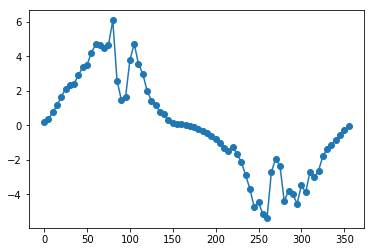

In [52]:
# データ点をプロット
plt.scatter(x, y)
plt.plot(x, y)